In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
import pandas as pd

In [2]:
# Distance run in miles
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Amount of water consumed in liters
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

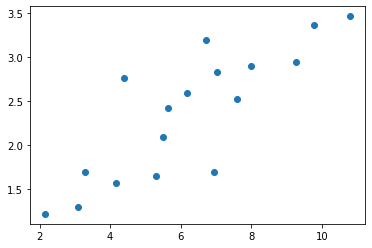

In [3]:
plt.scatter(X, Y)

In [4]:
lr = LinearRegression()

In [5]:
X = X.reshape(-1, 1)

In [6]:
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr.coef_, lr.intercept_

(array([0.25163494]), 0.7988012261753894)

In [11]:
predicted = lr.predict(X)

In [30]:
summed = 0
for y_predicted, y_actual in zip(predicted, Y):
    summed += (y_predicted - y_actual)**2

summed = summed / len(Y)

In [31]:
mean_squared_error(Y, predicted)

0.15385767404191095

In [32]:
summed

0.15385767404191095

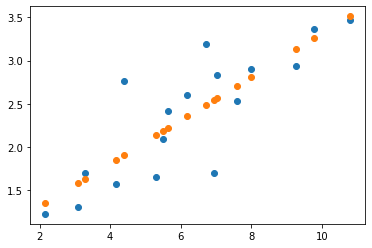

In [12]:
plt.scatter(X, Y)
plt.scatter(X, predicted)

In [39]:
ss_reg = np.sum((predicted - np.mean(Y))**2)

In [40]:
ss_tot = np.sum((Y - np.mean(Y))**2)

In [41]:
ss_reg

5.900786600111045

In [42]:
ss_tot

8.51636705882353

In [14]:
lr.predict([[5]])

array([2.05697595])

In [44]:
r_2 = ss_reg / ss_tot

In [45]:
r_2

0.6928760302783606

In [51]:
r2_score(Y, predicted)

0.6928760302783605

In [48]:
lr.score(X, Y)

0.6928760302783605

In [15]:
def mean_of(items):
    return np.mean(items)

In [58]:
df = pd.read_csv('data/advertising.csv', index_col=0)

In [59]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [62]:
train_df = df.iloc[:150]
test_df = df.iloc[150:]

In [63]:
sales_lr = LinearRegression()

In [64]:
sales_lr.fit(train_df.drop('sales', axis=1), train_df['sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
predicted = sales_lr.predict(test_df.drop('sales', axis=1))

In [73]:
mean_squared_error(test_df['sales'], predicted)

2.66702486838371

In [74]:
predicted

array([18.67186188, 10.15990172, 16.48950045, 18.17132726, 15.63964047,
        5.30168953, 15.19930681, 10.27021058, 10.15577653, 12.48190724,
       14.35100299, 13.43010832, 15.10545883, 17.32542469, 11.17561481,
       14.54411372, 10.60623457, 13.6578278 , 17.31920373, 18.29020846,
        7.44118029, 14.4553876 ,  7.54376735, 12.20415315, 14.07598825,
       24.7841683 , 20.11008458, 12.38328494, 16.41529992, 12.58762415,
       10.84616747, 14.23249384,  6.65512798, 24.18338541, 18.74887883,
       20.75225663,  9.92682913, 17.15002463, 18.96767352,  6.05302918,
       12.27336433,  8.51313117,  4.53156602, 18.42150484, 16.46286778,
        5.47156415,  8.32748549, 13.01318332, 23.82330766, 15.4737108 ])

In [76]:
sales_lr.score(test_df.drop('sales', axis=1), predicted)

1.0

In [112]:
sales_lr.predict([[100, 100, 20]])

array([25.69498118])

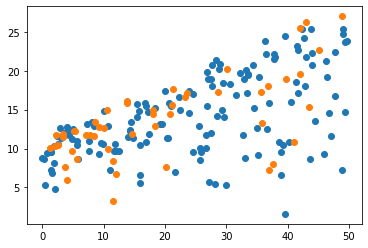

In [116]:
plt.scatter(train_df['radio'], train_df['sales'])
plt.scatter(test_df['radio'], test_df['sales'])

In [105]:
lowered = TSNE(n_components=1)

lowered_data = lowered.fit_transform(df.drop('sales', axis=1))

In [106]:
lowered_train_df = lowered_data[:150]
lowered_test_df = lowered_data[150:]

In [107]:
lowered_lr = LinearRegression()

In [108]:
lowered_lr.fit(lowered_train_df, train_df['sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lowered_pred = lowered_lr.predict(lowered_test_df)

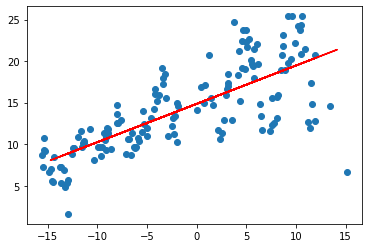

In [110]:
plt.scatter (lowered_data[:150], train_df['sales'])
plt.plot(lowered_data[150:], lowered_pred, 'r')


In [124]:
def find_index_range(items, n):
    result = [None, None]
    
    def set_first_to(item):
        result[0] = item
    
    def set_last_to(item):
        result[1] = item
    
    for index, item in enumerate(items):
        if item == n:
            if result[0] is None:
                set_first_to(index)
            
            set_last_to(index)
    
    return result

In [127]:
find_index_range([1, 2, 3, 10, 2, 15, 25, 90, 2, 33], 2)

[1, 8]

In [126]:
def find_index_range(items, n):
    result = [None, None]

    for index, item in enumerate(items):
        if item == n:
            if result[0] is None:
                result[0] = index
                
            result[1] = index
    
    return result

In [1]:
array = [1, 2, 3, 4, 1, 1, 1, 1, 2, 1, 1, 2, 3, 4, 5, 6]

In [7]:
num_rows = int(len(array) ** .5)

In [8]:
num_rows

4

In [14]:
result = []
for i in range(num_rows):
    row = []
    for j in range(num_rows):
        row.append(array[i*num_rows + j])
        print(i*num_rows, j)
    
    print(row)
    result.append(row)

0 0
0 1
0 2
0 3
[1, 2, 3, 4]
4 0
4 1
4 2
4 3
[1, 1, 1, 1]
8 0
8 1
8 2
8 3
[2, 1, 1, 2]
12 0
12 1
12 2
12 3
[3, 4, 5, 6]


In [16]:
[[array[i + j*num_rows] for i in range(num_rows)] for j in range(num_rows)]

[[1, 2, 3, 4], [1, 1, 1, 1], [2, 1, 1, 2], [3, 4, 5, 6]]

In [15]:
result

[[1, 2, 3, 4], [1, 1, 1, 1], [2, 1, 1, 2], [3, 4, 5, 6]]